In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [43]:
def INFO(what):
    print(f">>>>>>> {what} >>>>>>>")

In [44]:
INFO("Đặt đường dẫn dataset")
data_path = r"./bank+marketing/bank-additional/bank-additional/bank-additional-full.csv"

INFO("Phân tách csv, ký tự phân tách là `;`")
df = pd.read_csv(data_path, sep=';')

INFO("Kiểm tra kiểu dữ liệu của mỗi cột")
print(df.dtypes)

INFO("Thống kê số lượng thuộc tính theo kiểu dữ liệu")
print("\nSố lượng đặc trưng theo kiểu dữ liệu:")
print(df.dtypes.value_counts())

INFO("Kiểm tra một số dòng đầu tiên để xem dữ liệu thực tế")
INFO("Mẫu dữ liệu:")
print(df.describe())

>>>>>>> Đặt đường dẫn dataset >>>>>>>
>>>>>>> Phân tách csv, ký tự phân tách là `;` >>>>>>>
>>>>>>> Kiểm tra kiểu dữ liệu của mỗi cột >>>>>>>
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object
>>>>>>> Thống kê số lượng thuộc tính theo kiểu dữ liệu >>>>>>>

Số lượng đặc trưng theo kiểu dữ liệu:
object     11
int64       5
float64     5
Name: count, dtype: int64
>>>>>>> Kiểm tra một số dòng đầu tiên để xem dữ liệu thực tế >>>>>>>
>>>>>>> Mẫu dữ liệu: >>>>>>>
               age      durati

In [45]:
INFO("Thống kê các cột categorical")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n#### {col} ####:")
    print(df[col].value_counts())

>>>>>>> Thống kê các cột categorical >>>>>>>

#### job ####:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

#### marital ####:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

#### education ####:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

#### default ####:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

#### housing ####:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

#### l

In [46]:
INFO("Kiểm tra biến Y xem có cân bằng không")
yes_count = (df['y'] == "yes").sum()
no_count = (df['y'] == "no").sum()
print(f'#yes = {yes_count}; %ratio = {100*(yes_count/(no_count+yes_count))}%')
print(f'#no = {no_count}; %ratio = {100*(no_count/(no_count+yes_count))}%')
INFO("Từ kết quả, cho thấy dữ liệu không cân bằng!")

>>>>>>> Kiểm tra biến Y xem có cân bằng không >>>>>>>
#yes = 4640; %ratio = 11.265417111780131%
#no = 36548; %ratio = 88.73458288821988%
>>>>>>> Từ kết quả, cho thấy dữ liệu không cân bằng! >>>>>>>


In [47]:
# INFO("Mã hóa dữ liệu ")
# label_encoders = {}
# categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'y']
# for col in categorical_cols:
#     print(f"Processing `{col}` \t\tcolumn \t\t/ `{df[col].dtype}`...")
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le
# # Encode y separately
# df['y'] = df['y'].map({'yes': 1, 'no': 0})  # Or use LabelEncoder if preferred
# df.describe()

In [48]:
INFO("Chia IN/OUT")
X, Y = df.drop(columns=['y']), df['y']
INFO("X:")
print(X.describe())
INFO("Y:")
print(Y.describe())

>>>>>>> Chia IN/OUT >>>>>>>
>>>>>>> X: >>>>>>>
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std    

In [49]:
INFO("Chia tập dữ liệu với stratify để đảm bảo tỷ lệ lớp ")
test_size=0.1 
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=test_size, 
    random_state=42, 
    stratify=Y
)
INFO("X_train:")
print(X_train.head())
INFO("Y_train:")
print(Y_train.head())

>>>>>>> Chia tập dữ liệu với stratify để đảm bảo tỷ lệ lớp  >>>>>>>


>>>>>>> X_train: >>>>>>>
       age          job   marital            education  default housing loan  \
8061    52   technician  divorced  professional.course  unknown     yes   no   
25300   36   management   married    university.degree       no     yes   no   
17667   53  blue-collar   married          high.school       no     yes  yes   
37400   45  blue-collar    single             basic.9y       no     yes   no   
4629    60    housemaid   married          high.school  unknown     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
8061   telephone   jun         mon        56         8    999         0   
25300   cellular   nov         tue       267         2    999         0   
17667   cellular   jul         mon       243         2    999         0   
37400   cellular   aug         wed       249         1      4         1   
4629   telephone   may         wed        74         1    999         0   

          poutcome  emp.var.rate  cons.pric

In [50]:
INFO("Training class distribution:")
print(Y_train.value_counts(normalize=True) * 100)
INFO("Test class distribution:")
print(Y_test.value_counts(normalize=True) * 100)

>>>>>>> Training class distribution: >>>>>>>
y
no     88.734522
yes    11.265478
Name: proportion, dtype: float64
>>>>>>> Test class distribution: >>>>>>>
y
no     88.73513
yes    11.26487
Name: proportion, dtype: float64


In [51]:
INFO("Tách dữ liệu số (numberical) và dữ liệu dạng phân loại (categorical)")
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
INFO("Tách target và features của lớp dữ liệu categorical")
categorical_features.remove('y')  

>>>>>>> Tách dữ liệu số (numberical) và dữ liệu dạng phân loại (categorical) >>>>>>>
>>>>>>> Tách target và features của lớp dữ liệu categorical >>>>>>>


In [52]:
INFO("Xây dựng pipeline với OneHotEncoder và SMOTE")
INFO("Xác định bộ tiền xử lý với OneHotenCoder cho các tính năng phân loại")
scaler = StandardScaler()
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', scaler, numerical_features),
    ('cat', ohe, categorical_features)
])
INFO("Tạo pipeline với tiền xử lý, smote và phân loại")
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

>>>>>>> Xây dựng pipeline với OneHotEncoder và SMOTE >>>>>>>
>>>>>>> Xác định bộ tiền xử lý với OneHotenCoder cho các tính năng phân loại >>>>>>>
>>>>>>> Tạo pipeline với tiền xử lý, smote và phân loại >>>>>>>


In [53]:
INFO("Định nghĩa hyperparameter grid cho RandomForestClassifier")
param_grid = {
    'classifier__n_estimators': [100, 200],  # Number of trees
    'classifier__max_depth': [10, 20, None],  # Maximum depth of trees
    'classifier__min_samples_split': [2, 5],  # Minimum samples to split a node
    'classifier__min_samples_leaf': [1, 2]    # Minimum samples at a leaf node
}
INFO("Thiết lập StratifiedKFold cho cross-validation")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

>>>>>>> Định nghĩa hyperparameter grid cho RandomForestClassifier >>>>>>>
>>>>>>> Thiết lập StratifiedKFold cho cross-validation >>>>>>>


In [54]:
INFO("Tìm kiếm hyperparameter với GridSearchCV và cross-validation")
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_macro',  # Focus on F1-score for imbalanced data
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

grid_search.fit(X_train, Y_train)

INFO("Kết quả GridSearchCV")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-macro score: {grid_search.best_score_:.3f}")

>>>>>>> Tìm kiếm siêu tham số với GridSearchCV và cross-validation >>>>>>>
Fitting 5 folds for each of 24 candidates, totalling 120 fits


>>>>>>> Kết quả GridSearchCV >>>>>>>
Best parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation F1-macro score: 0.786


>>>>>>> Đánh giá mô hình tốt nhất trên tập test >>>>>>>
              precision    recall  f1-score   support

          no       0.97      0.93      0.95      3655
         yes       0.58      0.74      0.65       464

    accuracy                           0.91      4119
   macro avg       0.77      0.84      0.80      4119
weighted avg       0.92      0.91      0.91      4119

Accuracy: 0.9092012624423403
>>>>>>> Hiển thị tầm quan trọng của đặc trưng >>>>>>>


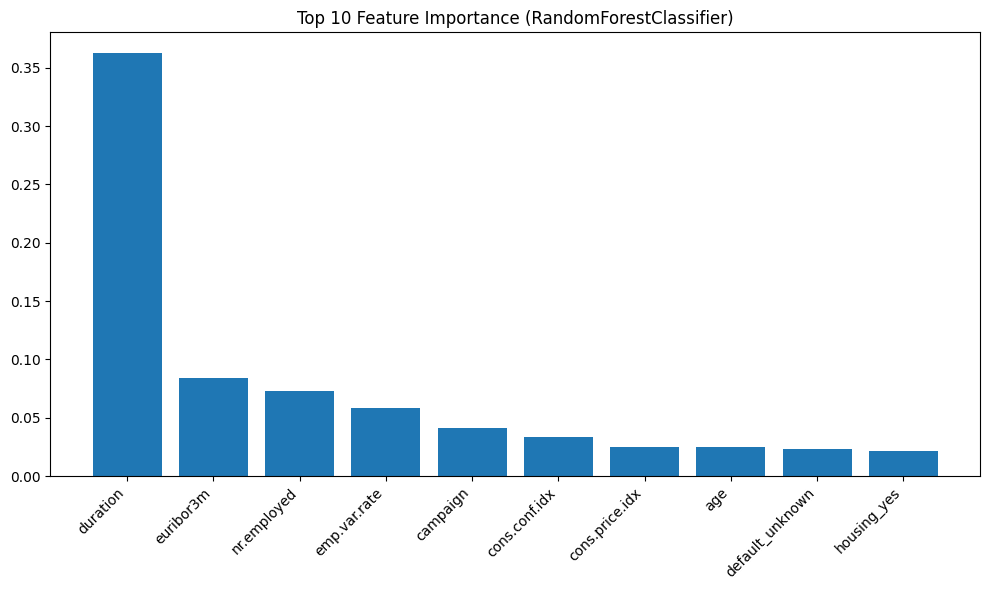

In [55]:
INFO("Đánh giá mô hình tốt nhất trên tập test")
y_pred = grid_search.predict(X_test)
print(classification_report(Y_test, y_pred))
print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")

INFO("Hiển thị tầm quan trọng của đặc trưng")
ohe_features = grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, ohe_features])
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

indices = np.argsort(importances)[::-1][:10]  # Top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices], align='center')
plt.xticks(range(10), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.title("Top 10 Feature Importance (RandomForestClassifier)")
plt.tight_layout()
plt.show()